<a href="https://colab.research.google.com/github/EthanLampone/AI-CLASS-FALL-2025/blob/main/HW2/Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## ETHAN LAMPONE
## HOMEWORK 2 - PROBLEM 1
## CSC 362 - AI
## 26 SEPTEMBER 2025

In [1]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
## TO BEGIN THIS PROBLEM, WE NEED TO INITIALIZE THE GRAPH:
friends = {
    'Bob': ['Richard','Rob', 'Pam'],
    'Pam': ['Roger', 'Peter'],
    'Peter': ['Amy'],
    'Roger': ['Anna']
}

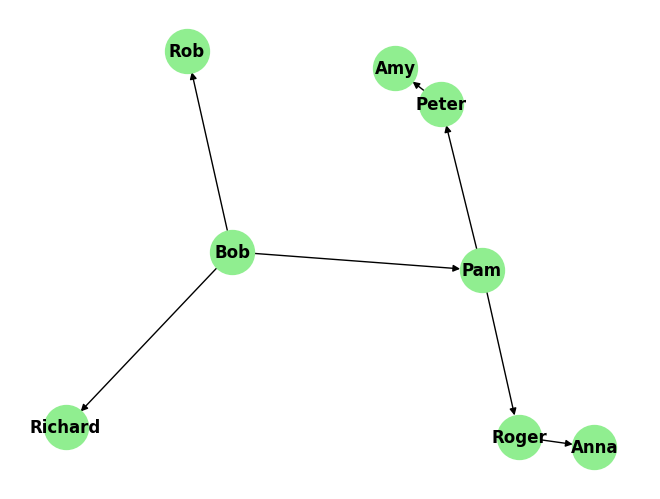

In [5]:
## WAY TO VISUALZIE THE GRAPH IN PYTHON JUST TO SEE THE GRAPH
G = nx.DiGraph(friends)
nx.draw(G, with_labels=True, node_color='lightgreen', font_weight='bold',
        font_size='12', node_size = 1000)
plt.show()

In [3]:
def FindFriends(graph, root, k):
  # INITIALIZE VISITED SET, DEQUE QUEUE FOR NODES, AND AN EMPTY LIST FOR K LVL FRIENDS
  visited, queue, k_lvl_friends = set(), deque([(root,0)]), []
  visited.add(root)
  # DEQUE
  while queue:
    # ASSIGN VALUES FROM THE DEQUE USING "popleft()"
    friend, lvl = queue.popleft()

    # IF K = 0, RETURN EMPTY SET --> NO LVL FRIENDS
    if lvl == k and k == 0:
      return [friend]
    # IF LVL == K, APPEND THE NAME OF THE CURRENT FRIEND(S) TO "k_lvl_friends"
    if lvl == k:
      k_lvl_friends.append(friend)
    # IF LVL > K, BREAK OUT OF THE LOOP; WE ARE OUT OF k RANGE
    elif lvl > k:
      break

    # FOR LOOP TO GET THE FRIENDS OF CURRENT FRIEND AND APPEND THEM TO THE
    # VISITED NODE AND APPEND THEM TO THE DEQUE WITH AN INCREASE IN LVL + 1.
    for neighbor in graph.get(friend,[]):
      if neighbor not in visited:
        visited.add(neighbor) # ADD CURRENT NEIGHBOR TO VISITED
        queue.append([neighbor,lvl+1]) # APPEND NEW NEIGHBOR + LVL INCREASE

  # RETURN THE LIST OF K LVL FRIENDS!
  return k_lvl_friends

In [4]:
## TEST 1 (ORIGINAL)
FindFriends(friends,'Bob',1)

['Richard', 'Rob', 'Pam']

In [5]:
## TEST 2 (k = 1 w/ NO FRIENDS)
FindFriends(friends,'Anna',1)

[]

In [6]:
## TEST 3 (k = 1 w/ ONE FRIEND)
FindFriends(friends,'Roger',1)

['Anna']

In [7]:
## TEST 4 (k = 2)
FindFriends(friends,'Bob',2)

['Roger', 'Peter']

In [8]:
## TEST 5 (k = 3)
FindFriends(friends, 'Bob',3)

['Anna', 'Amy']